---

# Misc checks

## normalization
LASSO (Least Absolute Shrinkage & Selection Operator) based on L1 norm:
Use of this penalty function has several limitations:
 - For example, in the "large p, small n" case (e.e. high-dimensional data with few sampled), the LASSO selects at most n variables before it saturates
 - Also if there is a group of highly correlated variables, then the LASSO tends to select one variable from a group and ignore the others
 
Abstract from the paper:
We propose a new method for estimation in linear models. The `lasso' minimizes the residual sum of squares subject to the sum of the absolute value of the coefficients being less than a constant. Because of the nature of this constraint it tends to produce some coefficients that are exactly 0 and hence gives interpretable models. Our simulation studies suggest that the lasso enjoys some of the favourable properties of both subset selection and ridge regression. It produces interpretable models like subset selection and exhibits the stability of ridge regression. There is also an interesting relationship with recent work in adaptive function estimation by Donoho and Johnstone. The lasso idea is quite general and can be applied in a variety of statistical models: extensions to generalized regression models and tree-based models are briefly described.

# softmax v/s SVM classifier

## softmax classifier
 - interprets the final score as the unormalized log probabilities
 - the loss function is called a cross-entropy
 
## SVM classifier
 - SVM aims to maximize the score with a margin (hyper-parameter)
 - the loss is called hinge loss / max-margin
 
<b>Note</b>: the loss function is not the same as classifier name, but, is sometimes interchanged..

 see [here](http://cs231n.github.io/assets/svmvssoftmax.png) for a visual representation

SCORES: [-2.58  0.86  0.28  2.5   3.5 ]


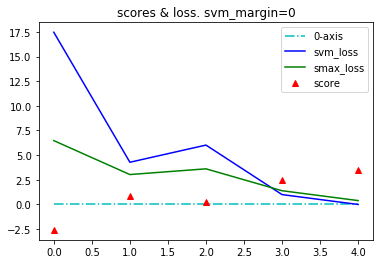

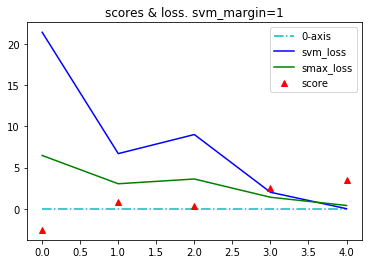

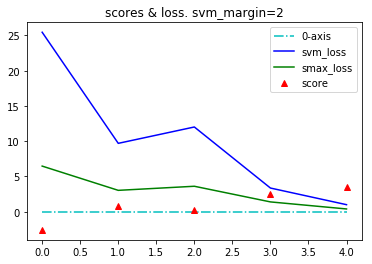

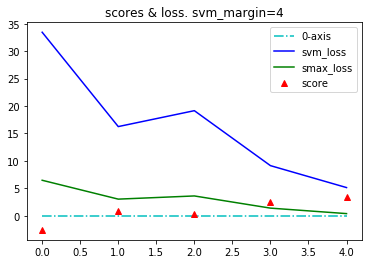

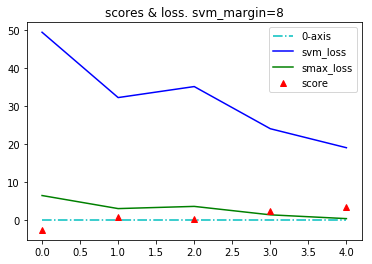

In [7]:
%matplotlib inline

# example of SVM v/s softmax classifier
import numpy as np
import matplotlib.pyplot as plt

# final scores after W.x
scores = np.array([-2.58,0.86,0.28,2.5,3.5])

#   ----- SVM Classifier ----- #
def svm_classifier(scores,yi,margin=1):
    # margin by which correct class must be greater than others by
    svm__max_margin = margin

    # svm loss: i.e. hinge loss
    # use this to create the final sum of values
    svm__msk = np.ones(len(scores))
    svm__msk[yi] = 0

    # Loss_svm = sum[j<>i](Sj-Si+margin)
    Si = scores[yi]
    svm__diff = scores - Si + svm__max_margin
    svm__max = np.maximum(svm__diff,0)

    # sum the max values for [j <> i]
    svm__loss = np.dot(svm__max,svm__msk.T)
    #print ("--- SVM ---","\nLOSS(hinge)        :%3.3f" %(svm__loss))
    return svm__loss

#   ----- Softmax Classifier ----- #
def smax_classifier(scores,yi):
    smax__exp  = np.exp(scores)
    #smax__exp  -= np.max(smax__exp)
    smax__sum  = np.sum(smax__exp)
    smax__norm = smax__exp/smax__sum
    smax__temp = -np.log(smax__norm)
    smax__loss = smax__temp[yi]
    #print ("--- SMAX ---","\nLOSS(cross-entropy):%3.3f" %(smax__loss))
    return smax__loss

# which class is the correct on
def plot_scores_loss(svm_margin=1):
    svm_loss  = []
    smax_loss = []
    for i in range(0,len(scores)):
        #print ("\nSCORE(correct-index)=%3.3f"%(scores[i]))
        svm_loss.append (svm_classifier (scores,i,margin=svm_margin))
        smax_loss.append(smax_classifier(scores,i))

    # mark out the zero line
    zeros=np.zeros(len(scores))
    plt.plot(zeros,    'c-.',label='0-axis')
    plt.plot(svm_loss, 'b-', label='svm_loss')
    plt.plot(smax_loss,'g-', label='smax_loss')
    plt.plot(scores,   'r^', label='score')
    plt.legend()
    plt.title("scores & loss. svm_margin="+str(svm_margin))
    plt.show()

print ("SCORES:",scores)
svm_margins = [0,1,2,4,8]
for svm_margin in svm_margins:
    plot_scores_loss(svm_margin=svm_margin)

# regularization
## difference between L1/L2 reg
[reference](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)


|L1 reg|L2 reg
|---|---|---|
|natural feature selection|no feature selection
|not computationally inefficient ^for non-sparse case^|computationaly efficient
|sparse outputs|non-sparse output


[ElasticNet](http://www.stat.purdue.edu/~tlzhang/mathstat/ElasticNet.pdf) (tries to overcome L1/L2 limitations)

## L1/L2 loss: effect of outliers...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def L1_loss (x,y):
    z = np.subtract(y,x)
    s = np.sum(np.absolute(z))
    s=np.asscalar(s)
    return s

def L2_loss (x,y):
    z = np.subtract(y,x)
    s = np.dot(z.T,z)
    s=np.asscalar(s)
    return s

def percent_diff (a,b):
    return ( ((b-a)/a) * 1.)


x = np.array(([1],[2],[3],[5]))
y = np.array([2])
L1_1 = L1_loss(x,y)
L2_1 = L2_loss(x,y)
# 1st sample
print ("2nd:L1=%03.4f,L2=%03.4f" %(L1_1,L2_1))

# 2nd sample (added an outlier to x, '40')
x = np.array(([1],[2],[3],[40]))
L1_2 = L1_loss(x,y)
L2_2 = L2_loss(x,y)
print ("2nd:L1=%03.4f,L2=%03.4f" %(L1_2,L2_2))

L1_diff    = percent_diff(L1_1,L1_2)
L2_diff    = percent_diff(L2_1,L2_2)
L1_L2_rat  = L1_diff/L2_diff

print ("L1-diff=%03.4f" %(L1_diff))
print ("L2-diff=%03.4f" %(L2_diff),'\n')
print ("L1/L2 ratio=%03.4f"%(L1_L2_rat))

2nd:L1=5.0000,L2=11.0000
2nd:L1=40.0000,L2=1446.0000
L1-diff=7.0000
L2-diff=130.4545 

L1/L2 ratio=0.0537


## getting a sense of the L1/L2 distance..

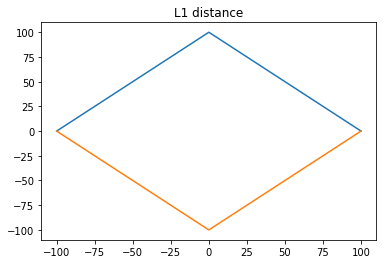

In [3]:
limit = 100
x = [it for it in range(-limit,(limit+1))]
c = limit
y = np.subtract(np.absolute(c),np.absolute(x))
z = -y
# L1 'circle'
plt.title('L1 distance')
plt.plot(x,y)
plt.plot(x,z)
plt.show()

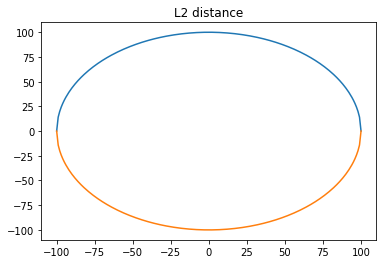

In [4]:
limit = 100
x = [it for it in range(-limit,(limit+1))]
c = limit
y = np.sqrt(np.square(c) - np.square(x))
z = -y
# L2 circle
plt.title('L2 distance')
plt.plot(x,y)
plt.plot(x,z)
plt.show()

---
# parameter calculations (conv nets)
number of parameters at Layer(n) with filter sides f<sub>l</sub>,f<sub>w</sub> and D<sub>n</sub> slices

num_param = D<sub>n</sub> \* { (D<sub>n-1</sub>\*f<sub>l</sub>*f<sub>w</sub>) + 1}

i.e each filter with size=D<sub>n-1</sub>\*f<sub>l</sub>\*f<sub>w</sub> + 1 (bias) per slice of layer 'n'

e.g. with this code:

## example: convnet + max-pool (keras):
<pre>
from keras import layers
from keras import models
    
input_len = 28
input_wid = 28
input_dep = 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_len, input_wid, input_dep)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.summary()
</pre>

> would give:

|layer|shape|parameters|
|-----|-----|----------|
|conv_1 (3x3)  |(None, 26, 26, 32 |        320       
|max_pooling_1 |(None, 13, 13, 32)|        0         
|conv_2 (3x3)  |(None, 11, 11, 64)|        18496 
|max_pooling_2 |(None, 5, 5, 64)  |        0
|conv_3 (5x5)  |(None, 1, 1, 64)  |        102464

## calculations:
> **320**  = 32 \*(1*9 + 1)
>
>**18496** = 64 \*(32*9 + 1)
>
>**102464** = 64 \*(64*25 + 1)
>
> Total:- 121,280

## example: classification (dense):
<pre>
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
</pre>

## summary
for the same network architecture, this is how the input image's spatial dimension / depth affect number of parameters:

|item|conv-layer|dense-layer
|---|---|---
|input spatial dimension|no impact| *impacts only first layer of dense*
|input depth | *impacts only first layer of conv* | no impact

# miscellaneous utilities .. 

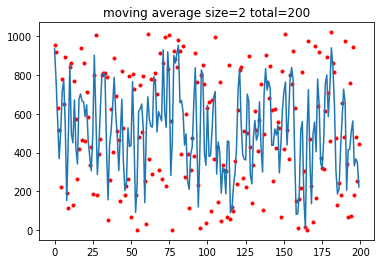

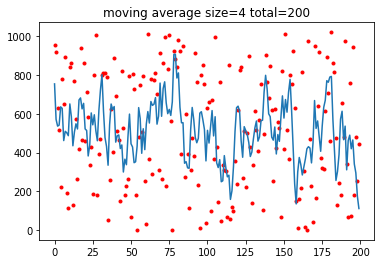

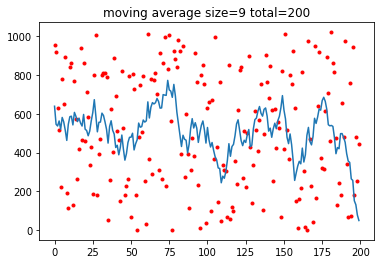

In [184]:
# moving average .. 
def moving_average(data,mov_avg_size=2):
    
    # adduming data is of type ndarray
    num_data     = data.size

    nums  = data.reshape(num_data,)
    acc   = np.zeros(num_data)
    nnums = np.append(nums,np.zeros(mov_avg_size,))
    num_el=len(nnums)

    for i in range(0,mov_avg_size):
        slc = nnums[i:num_data+i]
        acc = acc + slc

    # calculate moving average
    mov_avg = acc/mov_avg_size

    # sanity check
    if (mov_avg_size==1):
        assert(np.array_equal(nums,mov_avg))

    # plot
    title = 'moving average size=' + str(mov_avg_size) + " total=" + str(num_data)
    label = 'mov_avg=' + str(mov_avg_size)
    plt.plot(nums,'r.',)
    plt.title(title)
    plt.plot(mov_avg)
    plt.show()

# test code
num_data     = 200
data = np.random.randint(0x400,size=(num_data))

# see effect of moving average size
moving_average(data,0x2)
moving_average(data,0x4)
moving_average(data,0x9)